In [2]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt


---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [3]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(Path('Resources\lending_data.csv'))
# Review the DataFrame
# YOUR CODE HERE!

In [4]:
# Display the first 5 rows of the DataFrame
df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [18]:
# Dataframe info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [5]:
# Separate the data into labels and features

# Separate the y variable, the labels
y = df["loan_status"]

# Separate the X variable, the features
x = df.drop(columns="loan_status")

In [6]:
# Review the y variable Series
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: loan_status, dtype: int64

In [7]:
# Review the X variable DataFrame
x.head(10)

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000
5,10100.0,7.438,50600,0.407115,4,1,20600
6,10300.0,7.490,51100,0.412916,4,1,21100
7,8800.0,6.857,45100,0.334812,3,0,15100
8,9300.0,7.096,47400,0.367089,3,0,17400
9,9700.0,7.248,48800,0.385246,4,0,18800


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [8]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [19]:
print(f'Records in the dataset: {len(df)}')
print(f'Records in the training set: {len(x_train)}')
print(f'Records in the testing set: {len(x_test)}')

Records in the dataset: 77536
Records in the training set: 58152
Records in the testing set: 19384


---

## Create a Logistic Regression Model with the Original Data

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [9]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
model = LogisticRegression(solver='lbfgs', random_state=1)

# Fit the model using training data
model.fit(x_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [10]:
# Make a prediction using the testing data
test_predictions = model.predict(x_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [11]:
# Generate a confusion matrix for the model
cm_test = confusion_matrix(y_test, test_predictions)
cm_test_df = pd.DataFrame(
    cm_test, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)
cm_test_df


,Predicted 0,Predicted 1
Actual 0,18663,102
Actual 1,56,563


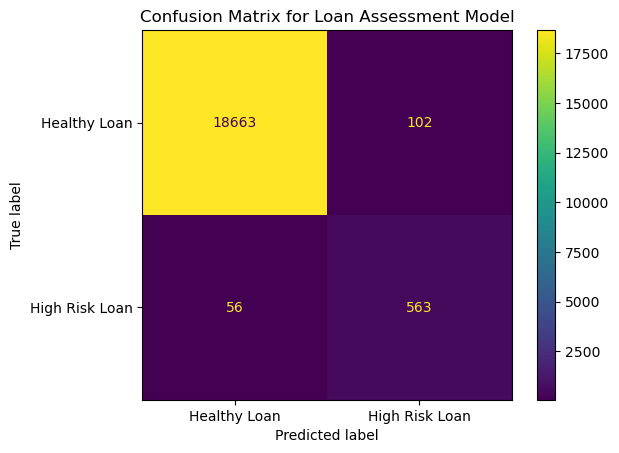

In [20]:
# An alternative display of the confusion matrix using Matplotlib
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=["Healthy Loan", "High Risk Loan"])
disp.plot()
plt.title("Confusion Matrix for Loan Assessment Model")

# Save diaplays to file
plt.savefig('Output/confusion_matrix.png', bbox_inches='tight')

plt.show()

In [13]:
# Print the classification report for the model
test_classification_report = classification_report(y_test, test_predictions, target_names=["Healthy Loan", "High Risk Loan"])
print(test_classification_report)

                precision    recall  f1-score   support

  Healthy Loan       1.00      0.99      1.00     18765
High Risk Loan       0.85      0.91      0.88       619

      accuracy                           0.99     19384
     macro avg       0.92      0.95      0.94     19384
  weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** The model is able to predict Healthy Loans (f1 1.00) better than the High Risk Loans (f1 0.88). Overall the model is very good at predicting between healthy and high risk loans with an accuracy scaore of 0.99.  

---